<a href="https://colab.research.google.com/github/oori/realsense-imu-test/blob/main/IMU_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMU plotting

In [114]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [115]:
df = pd.read_csv("ProccessedDataSet_3.csv",skiprows=10, names = ['time','tx','ty','tz','ax','ay','az']).iloc[:,:]
# df = pd.read_csv("test_data.csv",names = ['ax','ay','az','tx','ty','tz','lat','log','alt']).iloc[:,:]
df.head()

,time,tx,ty,tz,ax,ay,az
0,1.621787e+12,0.46900,1.634000,1.597000,1.241514,-3.508859,-8.196684
1,1.621787e+12,0.40700,1.658000,1.592000,1.341653,-3.527150,-8.272641
2,1.621787e+12,0.36436,1.671281,1.597592,1.412000,-3.540000,-8.326000
3,1.621787e+12,0.34600,1.677000,1.600000,1.427322,-3.608900,-8.396852
4,1.621787e+12,0.28300,1.695000,1.625000,1.478482,-3.838955,-8.633424


# Accelaration

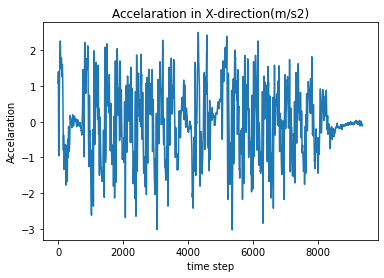

In [116]:
ax = np.array(df['ax']) - df['ax'].mean()

plt.plot(ax)
plt.title("Accelaration in X-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

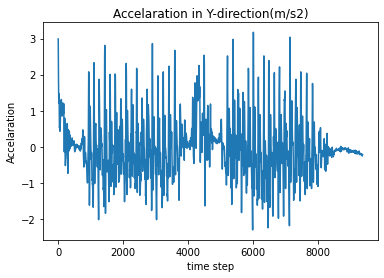

In [117]:
ay = np.array(df['ay']) - df['ay'].mean()
plt.plot(ay)
plt.title("Accelaration in Y-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

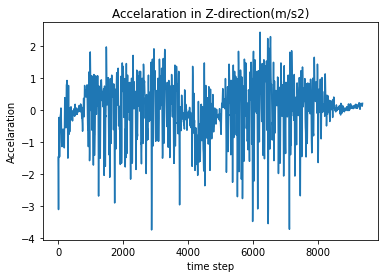

In [118]:
az = np.array(df['az']) - df['az'].mean()
plt.plot(az)
plt.title("Accelaration in Z-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

# Velocity 

In [119]:
# dt = 0.01
vy = []
v = 0
for i in range(ax.shape[0]):
    if i > 0:
      dt = (df["time"][i] - df["time"][i - 1]) / 1000
    # print(dt)
    v = v + ax[i]*dt
    vy.append(v)
vy = np.array(vy)

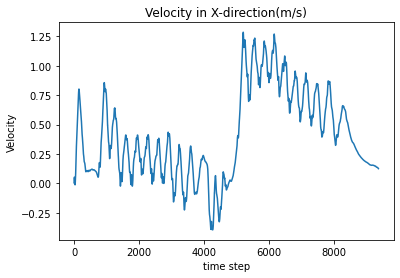

In [120]:
plt.plot(vy)
plt.title("Velocity in X-direction(m/s)")
plt.xlabel("time step")
plt.ylabel("Velocity")
plt.show()

# Displacement and distance

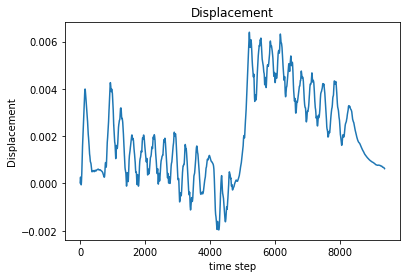

In [121]:
dy = vy * dt
plt.plot(dy)
plt.title("Displacement")
plt.xlabel("time step")
plt.ylabel("Displacement")
plt.show()

In [122]:
dist = []
d = 0
for i in range(ax.shape[0]):
    d = d + dy[i]
    dist.append(d)

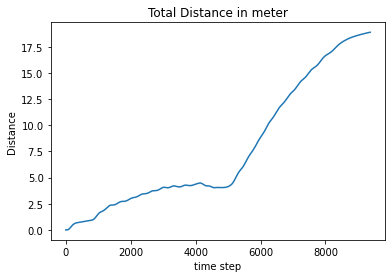

In [123]:
plt.plot(dist)
plt.title("Total Distance in meter")
plt.xlabel("time step")
plt.ylabel("Distance")
plt.show()

# Rotational Vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


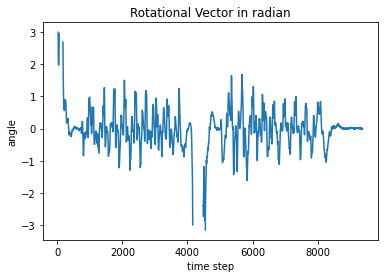

In [124]:
rot_angle = 2 * np.arcsin(np.array(df['tz']))
plt.plot(rot_angle)
plt.title("Rotational Vector in radian")
plt.xlabel("time step")
plt.ylabel("angle")
plt.show()

# Aprox trajectory 

In [125]:
x = 0
y = 0
X = []
Y = []
for i in range(ax.shape[0]-1):
    x = x + dy[i+1] * np.sin(rot_angle[i])
    y = y + dy[i+1] * np.cos(rot_angle[i])
    X.append(x)
    Y.append(y)

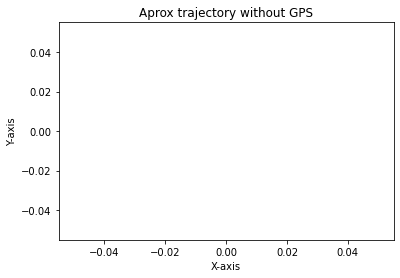

In [126]:
plt.scatter(X,Y)
plt.title("Aprox trajectory without GPS")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()